# Juan Camilo Ávila Bermúdez

In [87]:
import pandas as pd
import numpy as np

import re ## Exprexiones regulares
import nltk ## Procesamiento de lenguaje natural
from nltk.corpus import stopwords ## Palabras vacias
from nltk.stem import SnowballStemmer ## Stemming
from nltk.tokenize import word_tokenize ## Tokenizacion
from nltk.tokenize import RegexpTokenizer ## Tokenizacion
from sklearn.feature_extraction.text import CountVectorizer ## Vectorizador
import spacy ## Procesamiento de lenguaje natural

############## Descarga de recursos de nltk ################
nltk.download('punkt') ## Tokenizador
nltk.download('stopwords') ## Palabras vacias
nltk.download('snowball_data') ## Stemming
nltk.download('wordnet') ## Lematizacion

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Catnip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Catnip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     C:\Users\Catnip\AppData\Roaming\nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Catnip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
!python -m spacy download es_core_news_sm

  Using cached es_core_news_sm-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


DEPRECATION: https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-2.3.1/es_core_news_sm-2.3.1.tar.gz#egg=es_core_news_sm==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617


In [89]:
df=pd.read_csv('https://raw.githubusercontent.com/Izainea/nlp_ean/refs/heads/main/Datos/Datos%20Crudos/reviews_booking.csv')
df

C:\Users\Catnip\AppData\Local\Temp\ipykernel_26636\4081562006.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('https://raw.githubusercontent.com/Izainea/nlp_ean/refs/heads/main/Datos/Datos%20Crudos/reviews_booking.csv')


,Unnamed: 0,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10,Fue la Mejor Opción que pudimos haber tomado e...,NaN,Sí
1,1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10,"Ubicación, comodidades y limpieza",NaN,Sí
2,2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10,"El lugar esta muy bien ubicado, el apartamento...",NaN,Sí
3,3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10,Todo estuvo perfecto. La ubicación y la relaci...,NaN,Sí
4,4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10,"Es muy cómodo y acogedor, la atención es excel...",NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...
438208,438208,Estados Unidos,Apartamento Suite,1 noche,septiembre de 2024,En familia,22 de octubre de 2024,Fantástico,"9,0",NaN,NaN,No
438209,438209,Colombia,Apartamento de 1 dormitorio,1 noche,octubre de 2024,Persona que viaja sola,9 de octubre de 2024,Excepcional,10,NaN,NaN,No
438210,438210,México,Apartamento de 1 dormitorio,4 noches,agosto de 2024,Persona que viaja sola,6 de septiembre de 2024,Pésimo,"1,0",No me pareció nada,No obstante que dos días antes de mi llegada a...,Sí
438211,438211,Colombia,Apartamento de 1 dormitorio,2 noches,julio de 2024,En pareja,22 de julio de 2024,Excepcional,10,NaN,NaN,No


In [90]:
import nltk
nltk.download('punkt_tab')
nlp = spacy.load("es_core_news_sm")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Catnip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [91]:
print(df.dtypes)

Unnamed: 0          int64
País               object
Acomodación        object
Noches             object
Fecha hospedaje    object
Grupo viaje        object
Fecha reseña       object
Titulo             object
Calificación       object
Cosas Positivas    object
Cosas Negativas    object
reseña             object
dtype: object


In [92]:
df['Calificación']= df['Calificación'].str.replace(',','.').astype(float)

In [93]:
df.columns

Index(['Unnamed: 0', 'País', 'Acomodación', 'Noches', 'Fecha hospedaje',
       'Grupo viaje', 'Fecha reseña', 'Titulo', 'Calificación',
       'Cosas Positivas', 'Cosas Negativas', 'reseña'],
      dtype='object')

In [94]:
# Preprocesamiento
nlp=spacy.load("es_core_news_sm")

def clean_text(text):
  # Normalización
  text = text.lower()

  # Regex clean
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  # Tokenización
  tokens = word_tokenize(text)

  # Stop words
  stopwords_esp = stopwords.words('spanish')
  tokens = [token for token in tokens if token not in stopwords_esp]

  # Lemmatize
  doc = nlp(' '.join(tokens))
  tokens = [token.lemma_ for token in doc]

  return ' '.join(tokens)

corpus1['Texto_Limpio'] = corpus1['Texto'].apply(clean_text)
corpus1

,Texto,Etiqueta,Texto_Limpio
411942,Todo muy bien me gusto las habitaciones super ...,Positivo,bien gustar habitación super lindo cmodas
172897,"La atencion de todo el personal, hasta plancha...",Positivo,atencion personal planchar uno camisa cargar
69474,"El personal muy amable, las instalaciones muy ...",Positivo,personal amable instalación limpio cmodas
372225,"Todo muy bonito, aseado, completo, y el person...",Positivo,bonito asear completar personal atentar servicial
95138,Los Baños súper limpios y la habitación limpia...,Positivo,bao sper limpio habitacin limpio acogedor coci...
...,...,...,...
152352,"Es tranquilo, cómodo, aseado, personal muy ama...",Positivo,tranquilo cmodo asear personal amable bien ubicar
281522,La atención del personal y todo el ambiente de...,Positivo,atencin personal ambientar lujo histrico envol...
331240,Me gustó todo. Muy cómoda con buena vista. La ...,Positivo,gust cmoda bueno vestir comer exquisito
303789,"Excelente ubicación para tramites en embajada,...",Positivo,excelente ubicacin tramitar embajada sector tr...


In [95]:
corpus2['Texto_Limpio'] = corpus2['Texto'].apply(clean_text)
corpus2

,Texto,Etiqueta,Texto_Limpio
331941,"El televisor de la habitación estaba dañado, t...",Negativo,televisor habitacin daado tena desconfigurado ...
78275,"A little bit outdated interior, they call this...",Negativo,little bit outdated interior they call this 4 ...
158940,"Creo que se merece una remodelación, ya tienen...",Negativo,creer merecer remodelacin coser viejitas cerra...
244491,Falta calidez en el trato por parte del person...,Negativo,falto calidez tratar partir personal turnar noche
129906,"No tenia mini bar o nevera pequeña , no vendia...",Negativo,tenia mini bar nevera pequea vendian menos bebida
...,...,...,...
220930,"Algo costoso, la Habitación pequeña, colchón d...",Negativo,costoso habitacin pequea colchn durar duchar b...
433736,1-La Cama Sonaba Demasiado.🤣🤣🤣🤣\n2- Todo Se Es...,Negativo,1la cama sonar demasiar 2 escuchar 3 habitacin...
257888,"había un desorden cuando llegue en el lobby, a...",Negativo,haba desorden llegar lobby apartar ver cul rec...
224781,"la atención de la recepción fue pésima, la rec...",Negativo,atencin recepcin psima recepcionista sumamente...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Inicializar el vectorizador
vectorizer_positivos = CountVectorizer()
vectorizer_negativos = CountVectorizer()

# Transformar el corpus en una matriz BoW
X_positivos = vectorizer_positivos.fit_transform(corpus1['Texto_Limpio'])
frequencia_positivos = X_positivos.toarray().sum(axis=0)

X_negativos = vectorizer_negativos.fit_transform(corpus2['Texto_Limpio'])
frequencia_negativos = X_negativos.toarray().sum(axis=0)

## Mostrar el vocabulario
#  Crear DataFrames para ambos grupos
vocabulario_positivos = vectorizer_positivos.get_feature_names_out()
vocabulario_negativos = vectorizer_negativos.get_feature_names_out()

df_positivos = pd.DataFrame({'Palabra': vocabulario_positivos, 'Frecuencia': frequencia_positivos}).sort_values(by='Frecuencia', ascending=False)
df_negativos = pd.DataFrame({'Palabra': vocabulario_negativos, 'Frecuencia': frequencia_negativos}).sort_values(by='Frecuencia', ascending=False)

#  Mostrar los resultados
print("Palabras más frecuentes en positivos:\n", df_positivos.head(10))
print("Palabras más frecuentes en negativos:\n", df_negativos.head(10))

Palabras más frecuentes en positivos:
         Palabra  Frecuencia
950       bueno        2651
2504  excelente        2624
4587   personal        2393
6076   ubicacin        2161
1880  desayunar        1967
659     atencin        1833
3165      hotel        1625
415      amable        1399
2999  habitacin        1274
5457   servicio        1076
Palabras más frecuentes en negativos:
          Palabra  Frecuencia
5207   habitacin        3127
5464       hotel        2316
3116         dar        1644
5238       hacer        1399
3374   desayunar        1316
9178       ruido        1242
1537         bao        1210
10179        the        1142
5181        haba        1140
7210       noche        1082


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializar el vectorizador para positivos y negativos
vectorizer_positivos = TfidfVectorizer(ngram_range=(2,2))
vectorizer_negativos = TfidfVectorizer(ngram_range=(2,2))

# Transformar los textos en matrices TF-IDF
X_positivos = vectorizer_positivos.fit_transform(corpus1['Texto_Limpio'])
X_negativos = vectorizer_negativos.fit_transform(corpus2['Texto_Limpio'])

# Obtener los valores TF-IDF para cada palabra en los respectivos corpus
tfidf_positivos = X_positivos.toarray().sum(axis=0)
tfidf_negativos = X_negativos.toarray().sum(axis=0)

# Obtener el vocabulario correspondiente
vocabulario_positivos = vectorizer_positivos.get_feature_names_out()
vocabulario_negativos = vectorizer_negativos.get_feature_names_out()

# Crear DataFrames para ambos grupos
df_positivos = pd.DataFrame({'Palabra': vocabulario_positivos, 'TF-IDF': tfidf_positivos}).sort_values(by='TF-IDF', ascending=False)
df_negativos = pd.DataFrame({'Palabra': vocabulario_negativos, 'TF-IDF': tfidf_negativos}).sort_values(by='TF-IDF', ascending=False)

# Mostrar las palabras con mayor TF-IDF
print("Palabras con mayor TF-IDF en positivos:\n", df_positivos.head(30))


Palabras con mayor TF-IDF en positivos:
                    Palabra     TF-IDF
30253      personal amable  94.717882
4510      atencin personal  94.664849
17524   excelente ubicacin  72.383300
17212    excelente atencin  60.416103
7144        bueno ubicacin  55.933202
6151           bien ubicar  54.830955
6788         bueno atencin  50.054557
40221   ubicacin excelente  50.040469
13459  desayunar delicioso  46.627656
17486   excelente servicio  46.018214
30273     personal atentar  45.715068
20259      habitacin cmoda  40.408910
8770     cercar aeropuerto  39.676474
13412      desayunar bueno  39.539056
6877       bueno desayunar  38.954396
2246   amabilidad personal  37.928622
40123       ubicacin bueno  36.219920
30360   personal excelente  35.656665
13606       desayunar rico  33.666840
20587    habitación cmodas  32.205557
7106        bueno servicio  31.246926
40261       ubicacin hotel  26.916457
40318    ubicacin perfecto  26.609281
4309         atencin bueno  26.541705
13487  de

In [102]:
print("Palabras con mayor TF-IDF en negativos:\n", df_negativos.head(30))

Palabras con mayor TF-IDF en negativos:
                    Palabra     TF-IDF
2957        aguar calentar  40.384377
30337       escuchar ruido  26.737525
83338           todo noche  20.202007
15278             check in  18.927871
23429       demasiar ruido  18.555533
3361     aire acondicionar  18.326095
37828       habitacin tena  17.773205
7658      atencin personal  16.595920
36244           haba aguar  16.080224
71575     ruido habitación  15.415677
37640     habitacin pequea  14.571602
47819         llegar hotel  14.498091
49568             mal olor  13.642829
61659    personal recepcin  13.330428
32837  falto mantenimiento  13.219965
63598         poder dormir  13.186326
38716          hacer asear  13.121253
39050       hacer reservar  12.791793
13470    cambiar habitacin  12.744186
7038       asear habitacin  12.532637
21433        dar habitacin  12.480213
71456         ruido callar  12.321471
15283            check out  12.143052
29707   entregar habitacin  12.097462
16702   c

# Análisis descriptivo

In [104]:
# Palabras comunes entre positivos y negativos
comunes = set(df_positivos['Palabra']).intersection(set(df_negativos['Palabra']))
print("Palabras comunes:\n", comunes)


Palabras comunes:
 {'ir visitar', 'colaboracin partir', 'vena incluir', 'relacin preciobeneficio', 'location of', 'recibir noche', 'usar personal', 'limpiar lugar', 'tratar decir', 'disponible siempre', 'hora as', 'personal agradable', 'preciar bien', 'desayunar buffet', 'aguar bien', 'adems est', 'recepcin tenan', 'llenar servicio', 'tener estancia', 'lugar segundo', 'demasiar amable', 'compartir familia', 'mejorar habitacin', 'salar desayunar', 'bastante solo', 'agradable clima', 'this hostel', 'quedo tan', 'the house', 'bao bsico', 'temer desayunar', 'sleep and', 'cliente lugar', 'hacer ideal', 'agradable lugar', 'tender cama', 'noche tenia', 'fu bueno', 'duchar necesitar', 'llamar personal', 'personar hotel', 'personal front', 'cliente habitacin', 'desayunar agradable', 'encontrar bastante', 'lado hotel', 'atencin limpieza', 'sitiar hacer', 'callar desayunar', 'acceder transportar', 'atender personal', 'habitación desayunar', 'it really', 'igual formar', 'visar americano', 'llamar 

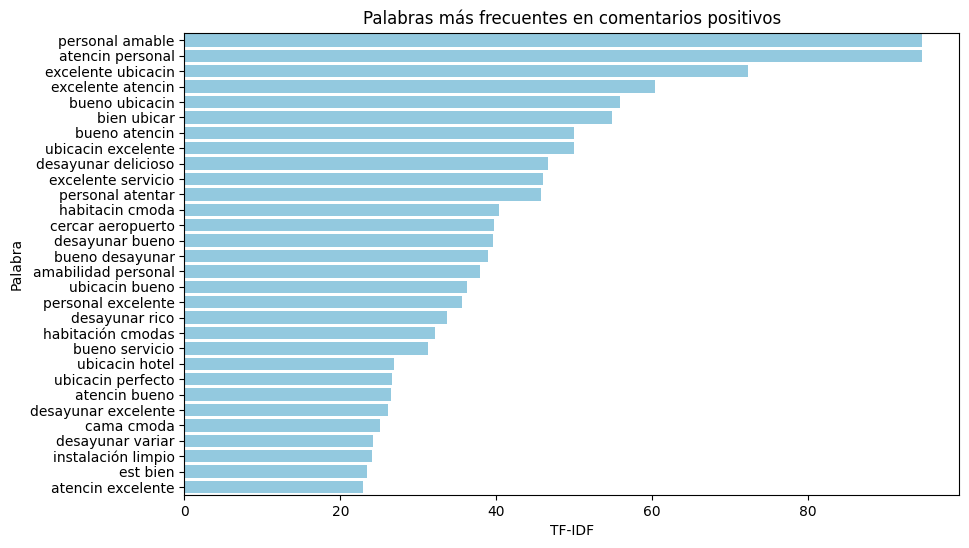

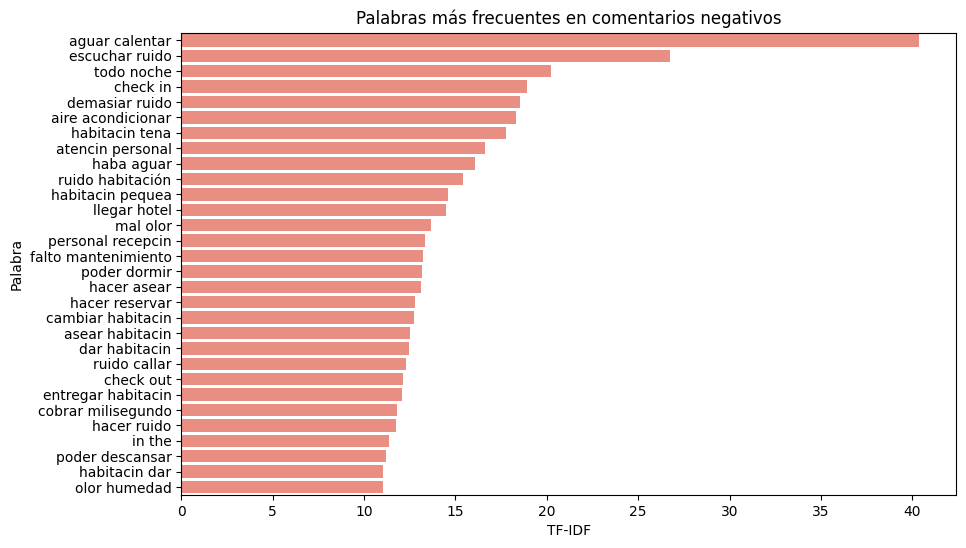

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico para positivos
plt.figure(figsize=(10, 6))
sns.barplot(x='TF-IDF', y='Palabra', data=df_positivos.head(30), color= "skyblue")
plt.title("Palabras más frecuentes en comentarios positivos")
plt.show()

# Gráfico para negativos
plt.figure(figsize=(10, 6))
sns.barplot(x='TF-IDF', y='Palabra', data=df_negativos.head(30), color="salmon")
plt.title("Palabras más frecuentes en comentarios negativos")
plt.show()




Podemos observar en la primera gráfica que las palabras más importantes en los comentarios positivos, están relacionadas con la atención del personal, la ubicación del hotel, la calidad del desayuno y el servicio en general.


En los comentarios negativos las palabras más frecuentes están relacionadas con incomodidad en las noches, el ruido, la dificultad para estar cómodo y descansar, y fallos en los servicios de agua y aire acondicionado.

In [109]:
comunes = set(df_positivos['Palabra']).intersection(set(df_negativos['Palabra']))
exclusivas_positivas = set(df_positivos['Palabra']) - comunes
exclusivas_negativas = set(df_negativos['Palabra']) - comunes

print("Palabras exclusivas de positivos:", exclusivas_positivas)
print("Palabras exclusivas de negativos:", exclusivas_negativas)


Palabras exclusivas de positivos: {'taxi cmodo', 'dato enviar', 'as preocuparse', 'entreg habitacin', 'milisegundo ofrecer', 'amplio do', 'instalación comedor', 'amigable locacin', 'sper economico', 'estafany was', 'personal conformar', 'very cool', 'personal transportar', 'detallar habitacion', 'personal administrador', 'general bonito', 'alrededor cercar', 'amenities amazing', 'visitar hacer', 'vestir panormica', 'agradable conversacin', 'tempranero espectacular', 'vez necesitabamos', 'good asir', 'ideal recorrer', 'colaborar hotel', 'completar and', 'perfecto compromiso', 'restaurants pub', 'atento limpo', 'parejo atencin', 'ropa amplio', 'personal cmodas', 'cmodas respetar', 'tienda facilidad', 'recomer definitivamente', 'seguro tradicional', 'siempre atendi', 'preocupar usuario', 'común limpio', 'sont amples', 'bamos mujer', 'bastante recomendar', 'sandra hermano', 'tienda candelaria', 'internacional claro', 'joven venezolano', 'great it', 'privar seguro', 'cenar hora', 'centrar c

In [110]:
longitudes_positivas = corpus1['Texto_Limpio'].apply(len).mean()
longitudes_negativas = corpus2['Texto_Limpio'].apply(len).mean()

print("Longitud promedio de textos positivos:", longitudes_positivas)
print("Longitud promedio de textos negativos:", longitudes_negativas)


Longitud promedio de textos positivos: 96.1424
Longitud promedio de textos negativos: 142.53866666666667


Aunque los comentarios negativos tienen en promedio una longitud mayor de aproximadamente 142 caracteres, las palabras negativas son menos frecuentes en los comentarios que las palabras positivas, esto tiene sentido porque a la hora de manifestar una queja hay que explicar la razón, en cambio el comentario positivo suele ser una afirmación

## Otro punto de vista de las palabras más importantes de los comentarios

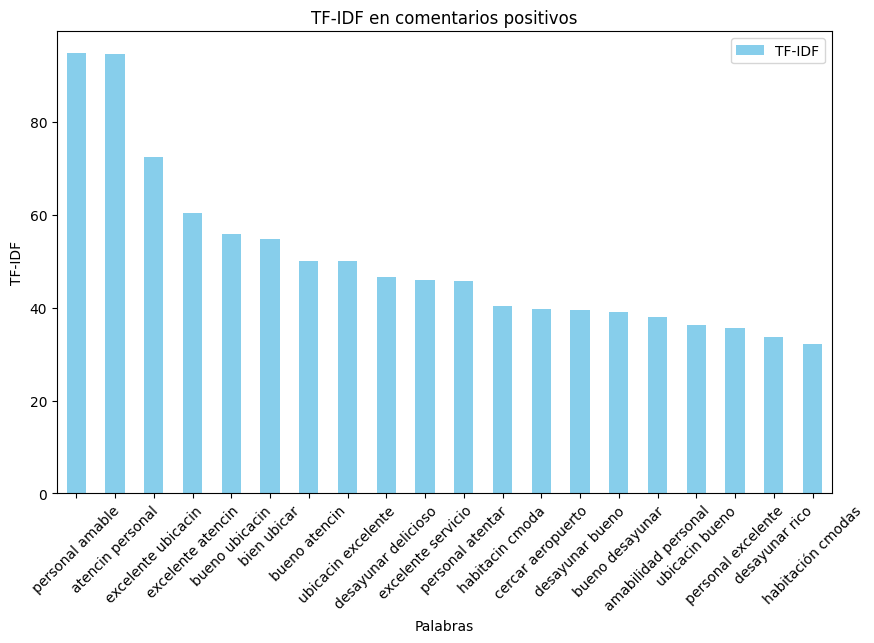

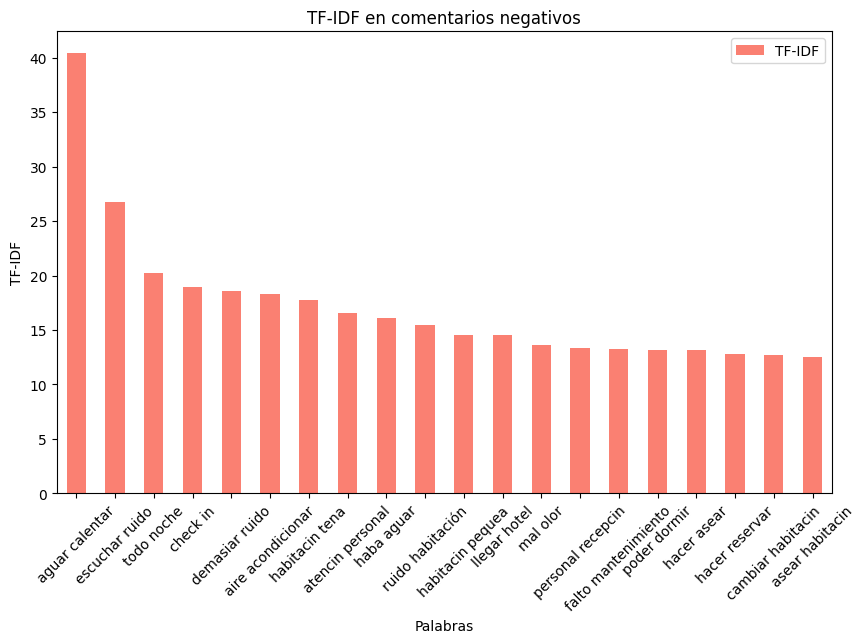

In [115]:
import matplotlib.pyplot as plt

# Gráfico para positivos
plt.figure(figsize=(10, 6))
df_positivos.head(20).plot.bar(
    x='Palabra', 
    y='TF-IDF', 
    title='TF-IDF en comentarios positivos', 
    color='skyblue', 
    ax=plt.gca()
)
plt.xlabel('Palabras')
plt.ylabel('TF-IDF')
plt.xticks(rotation=45)
plt.show()

# Gráfico para negativos
plt.figure(figsize=(10, 6))
df_negativos.head(20).plot.bar(
    x='Palabra', 
    y='TF-IDF', 
    title='TF-IDF en comentarios negativos', 
    color='salmon', 
    ax=plt.gca()
)
plt.xlabel('Palabras')
plt.ylabel('TF-IDF')
plt.xticks(rotation=45)
plt.show()
